In [1]:
!pip install -q transformers[torch] datasets
!pip install fasttext-langdetect
!pip install datasets

DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\morfessor-2.0.6-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\polyglot-16.7.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


  Using cached fasttext_langdetect-1.0.5-py3-none-any.whl
  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fasttext
Failed to build fasttext


DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\morfessor-2.0.6-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\polyglot-16.7.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [75 lines of output]
      C:\Users\jorge\miniconda3\Lib\site-packages\setuptools\dist.py:498: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-s

DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\morfessor-2.0.6-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\polyglot-16.7.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
!pip install -U pip wheel
!pip install ensemble-transformers

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
Using cached wheel-0.43.0-py3-none-any.whl (65 kB)


DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\morfessor-2.0.6-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\polyglot-16.7.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: To modify pip, please run the following command:
C:\Users\jorge\miniconda3\python.exe -m pip install -U pip wheel


DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\morfessor-2.0.6-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jorge\miniconda3\lib\site-packages\polyglot-16.7.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Imports

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from datasets import load_dataset
from datasets import Dataset
from datasets import concatenate_datasets
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


c:\Users\jorge\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from datasets import Dataset

dataset_en = Dataset.from_json("/content/drive/MyDrive/2024/test/subtask_1/test.jsonl")

dataset_en

FileNotFoundError: Unable to find '/content/drive/MyDrive/2024/test/subtask_1/test.jsonl'

# Test 2024

## Transformers langs

In [ ]:
from ftlangdetect import detect
import re

# Initialize an empty dictionary to store the texts for each language
language_datasets = {}
languages = ["en", "es", "ca", "pt", "eu", "gl"]

# Assuming dataset_en is a list of texts
for id_t,text in zip(dataset_en['id'], dataset_en['text']):
    try:

        language = detect(text)
    except:
        language = "Error, could not detect"

    # If the language is not already a key in the dictionary, add it with an empty list as its value
    if language['lang'] not in languages:
        if language['lang'] == 'it':
            language['lang'] = 'pt'
        elif language['lang'] == 'fr':
            language['lang'] = 'ca'
        else:
            language['lang'] = 'es'

    if language['lang'] not in language_datasets:
        language_datasets[language['lang']] = []

    # Append the text to the list of texts for its detected language
    language_datasets[language['lang']].append((id_t,text))

In [ ]:
# Set your threshold
threshold = 1000

# Create a new dictionary with only the items where the length of the list is greater than or equal to the threshold
#language_datasets = {language: texts for language, texts in language_datasets.items() if len(texts) >= threshold}

# Assuming language_datasets is your dictionary of languages and texts
for language, texts in language_datasets.items():
    print(f"Language: {language}, Number of texts: {len(texts)}")

Language: en, Number of texts: 10324
Language: ca, Number of texts: 8013
Language: pt, Number of texts: 9003
Language: es, Number of texts: 9116
Language: eu, Number of texts: 5518
Language: gl, Number of texts: 1391


In [ ]:
import pandas as pd

# Dictionary to store DataFrames
dataframes = {}

label_mapping = {"human": 0, "generated": 1}

def map_labels(example):
        # Map the original label to the new label
        example["label"] = label_mapping[example["label"]]
        return example

# Convert each list of tuples to DataFrame
for lang, data in language_datasets.items():
    df = pd.DataFrame(data, columns=['id', 'text'])

    dataframes[lang] = Dataset.from_pandas(df)

dataframes

{'en': Dataset({
     features: ['id', 'text'],
     num_rows: 10324
 }),
 'ca': Dataset({
     features: ['id', 'text'],
     num_rows: 8013
 }),
 'pt': Dataset({
     features: ['id', 'text'],
     num_rows: 9003
 }),
 'es': Dataset({
     features: ['id', 'text'],
     num_rows: 9116
 }),
 'eu': Dataset({
     features: ['id', 'text'],
     num_rows: 5518
 }),
 'gl': Dataset({
     features: ['id', 'text'],
     num_rows: 1391
 })}

In [ ]:
model_langs_names = {}

model_langs_names['en'] = "jorgefg03/albert-base-v2-autext2024"
model_langs_names['pt'] = "jorgefg03/bert-base-portuguese-cased-autext2024"
model_langs_names['es'] = "jorgefg03/roberta-base-bne-autext2024"
model_langs_names['gl'] = "jorgefg03/bert-galician-autext2024"
model_langs_names['eu'] = "jorgefg03/RoBasquERTa-autext2024"
model_langs_names['ca'] = "jorgefg03/roberta-base-ca-autext2024"
model_langs

{'en': 'jorgefg03/albert-base-v2-autext2024',
 'pt': 'jorgefg03/bert-base-portuguese-cased-autext2024',
 'es': 'jorgefg03/roberta-base-bne-autext2024',
 'gl': 'jorgefg03/bert-galician-autext2024',
 'eu': 'jorgefg03/RoBasquERTa-autext2024',
 'ca': 'jorgefg03/roberta-base-ca-autext2024'}

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

languages = ["en", "es", "ca", "pt", "eu", "gl"]
tokenizer_langs = {}
models_langs = {}


for lang in languages:
  tokenizer_langs[lang] = AutoTokenizer.from_pretrained(model_langs[lang])
  models_langs[lang] = AutoModelForSequenceClassification.from_pretrained(model_langs[lang])
  models_langs[lang].to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/896 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/884k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.30M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/678k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/891k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/537k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/741 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/334M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
def get_prediction_from_model_probs(text, model, tokenizer, max_length = 256):
  inputs = tokenizer(text, padding="max_length", max_length=max_length, truncation= True, return_tensors="pt").to('cuda')
  pred = model(**inputs).logits
  probs = pred.softmax(1)

  return probs[0][1].item()

In [ ]:
import pickle

preds_langs = {}

prefix = 'tr'

for lang in languages:
  print('Predictions for lang '+ lang)
  preds_langs[lang] = [(id_t, get_prediction_from_model_probs(text, models_langs[lang], tokenizer_langs[lang])) for id_t, text in zip(dataframes[lang]['id'], dataframes[lang]['text'])]
  with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_test_{lang}.pkl", "wb") as f:
    pickle.dump(preds_langs[lang], f)

In [ ]:
# Set your custom threshold here
threshold = 0.5

# Get predictions based on the custom threshold

only_preds = [item[1] for item in preds_langs['es']]
#preds_bin = (only_preds[:,1] >= threshold).astype('int')
only_preds

## Transformers multilingual

In [8]:
from datasets import Dataset

dataset_test = Dataset.from_json("/content/drive/MyDrive/2024/test/subtask_1/test.jsonl")

dataset_test

Dataset({
    features: ['id', 'text'],
    num_rows: 43365
})

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name1 = "jorgefg03/xlm-roberta-base-autext2024"
model_name2 = "jorgefg03/mdeberta-v3-base-autext2024"
model_name3 = "jorgefg03/distilbert-base-multilingual-cased-autext2024"

tokenizer1 = AutoTokenizer.from_pretrained(model_name1)
model1 = AutoModelForSequenceClassification.from_pretrained(model_name1)
model1.to("cuda")

tokenizer2 = AutoTokenizer.from_pretrained(model_name2)
model2 = AutoModelForSequenceClassification.from_pretrained(model_name2)
model2.to("cuda")

tokenizer3 = AutoTokenizer.from_pretrained(model_name3)
model3 = AutoModelForSequenceClassification.from_pretrained(model_name3)
model3.to("cuda")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/781 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [10]:
def get_prediction_from_model_probs(text, model, tokenizer, max_length = 256):
  inputs = tokenizer(text, padding="max_length", max_length=max_length, truncation= True, return_tensors="pt").to('cuda')
  pred = model(**inputs).logits
  probs = pred.softmax(1)

  return probs[0][1].item()

In [ ]:
import pickle

preds_langs = {}

prefix = 'multi'

print('Predictions 1')
preds1 = [(id_t, get_prediction_from_model_probs(text, model1, tokenizer1)) for id_t, text in zip(dataset_test['id'], dataset_test['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_test_roberta.pkl", "wb") as f:
  pickle.dump(preds1, f)

print('Predictions 2')
preds2 = [(id_t, get_prediction_from_model_probs(text, model2, tokenizer2)) for id_t, text in zip(dataset_test['id'], dataset_test['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_test_mdberta.pkl", "wb") as f:
  pickle.dump(preds2, f)

print('Predictions 3')
preds3 = [(id_t, get_prediction_from_model_probs(text, model3, tokenizer3)) for id_t, text in zip(dataset_test['id'], dataset_test['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_test_distilbert.pkl", "wb") as f:
  pickle.dump(preds3, f)

Predictions 1
Predictions 2
Predictions 3


### Probar ensembler

In [11]:
from datasets import Dataset
from datasets import DatasetDict, concatenate_datasets

dataset_train = Dataset.from_json("/content/drive/MyDrive/2024/train/subtask_1/train.jsonl")

dataset_train

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['id', 'text', 'label'],
    num_rows: 109663
})

In [12]:
from datasets import Dataset

# Assuming you have dataset_en already loaded and containing the 'train' split

# Define a mapping from original labels to new labels
label_mapping = {"human": 0, "generated": 1}

# Function to replace labels
def map_labels(example):
    # Map the original label to the new label
    example["label"] = label_mapping[example["label"]]
    return example

# Map the labels in the 'train' split
dataset_train = dataset_train.map(map_labels)

custom_label_names = ["human", "generated"]

dataset_train

Map:   0%|          | 0/109663 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'text', 'label'],
    num_rows: 109663
})

In [13]:
split_size = 0.2

splits = dataset_train.train_test_split(test_size=split_size, seed=32)
splits2 = splits['train'].train_test_split(test_size=(split_size/(1-split_size)), seed=32)


In [14]:
dataset_train = DatasetDict({
    "train": splits2['train'],
    "validation": splits['test'],
    'test': splits2['test']
})

# Print the updated dataset
print(dataset_train)

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label'],
        num_rows: 65797
    })
    validation: Dataset({
        features: ['id', 'text', 'label'],
        num_rows: 21933
    })
    test: Dataset({
        features: ['id', 'text', 'label'],
        num_rows: 21933
    })
})


In [15]:
LABELS = set(dataset_train['train']['label'])
NUM_LABELS = len(LABELS)
print('LABELS:', LABELS, 'num_labels:', NUM_LABELS )

LABELS: {0, 1} num_labels: 2


In [16]:
def get_prediction_from_model_probs(text, model, tokenizer, max_length = 256):
  inputs = tokenizer(text, padding="max_length", max_length=max_length, truncation= True, return_tensors="pt").to('cuda')
  pred = model(**inputs).logits
  probs = pred.softmax(1)

  return probs[0][1].item()

In [17]:
import pickle

preds_langs = {}

prefix = 'multi'

print('Predictions 1')
preds1 = [(id_t, get_prediction_from_model_probs(text, model1, tokenizer1)) for id_t, text in zip(dataset_train['validation']['id'], dataset_train['validation']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_val_roberta.pkl", "wb") as f:
  pickle.dump(preds1, f)

print('Predictions 2')
preds2 = [(id_t, get_prediction_from_model_probs(text, model2, tokenizer2)) for id_t, text in zip(dataset_train['validation']['id'], dataset_train['validation']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_val_mdberta.pkl", "wb") as f:
  pickle.dump(preds2, f)

print('Predictions 3')
preds3 = [(id_t, get_prediction_from_model_probs(text, model3, tokenizer3)) for id_t, text in zip(dataset_train['validation']['id'], dataset_train['validation']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_val_distilbert.pkl", "wb") as f:
  pickle.dump(preds3, f)

Predictions 1
Predictions 2
Predictions 3


In [18]:
print('Predictions 1')
preds1 = [(id_t, get_prediction_from_model_probs(text, model1, tokenizer1)) for id_t, text in zip(dataset_train['test']['id'], dataset_train['test']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_test_roberta.pkl", "wb") as f:
  pickle.dump(preds1, f)

print('Predictions 2')
preds2 = [(id_t, get_prediction_from_model_probs(text, model2, tokenizer2)) for id_t, text in zip(dataset_train['test']['id'], dataset_train['test']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_test_mdberta.pkl", "wb") as f:
  pickle.dump(preds2, f)

print('Predictions 3')
preds3 = [(id_t, get_prediction_from_model_probs(text, model3, tokenizer3)) for id_t, text in zip(dataset_train['test']['id'], dataset_train['test']['text'])]
with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_train_test_distilbert.pkl", "wb") as f:
  pickle.dump(preds3, f)

Predictions 1
Predictions 2
Predictions 3


## SVM models

In [1]:
!pip install fasttext-langdetect
!pip install datasets
!pip install stopwordsiso
!pip install simplemma

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 778.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7503 sha256=dc3dea0d6b70f2e41be67aa84082ee8af366b648ce8c2cb4b3596e1a209f6341
  Stored in directory: /root/.cache/pip/wheels/e6/5b/5d/47e2fd5c2ff1028722739ce35f365e8f6eeb89ec97aa63e621
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227139 sha256=369ab063b9835b9595008b03474269826262f2c5c1e94d7635944e599cc21edd
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext-langdetect fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━

In [2]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
import stopwordsiso as stopwordsd
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer, PortugueseStemmer, SpanishStemmer
import re
from simplemma import simple_tokenizer
from simplemma import text_lemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
from datasets import Dataset

dataset_test = Dataset.from_json("/content/drive/MyDrive/2024/test/subtask_1/test.jsonl")

dataset_test

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['id', 'text'],
    num_rows: 43365
})

In [6]:
from ftlangdetect import detect
import re

# Initialize an empty dictionary to store the texts for each language
language_datasets = {}
languages = ["en", "es", "ca", "pt", "eu", "gl"]

# Assuming dataset_en is a list of texts
for id_t,text in zip(dataset_test['id'], dataset_test['text']):
    try:

        language = detect(text)
    except:
        language = "Error, could not detect"

    # If the language is not already a key in the dictionary, add it with an empty list as its value
    if language['lang'] not in languages:
        if language['lang'] == 'it':
            language['lang'] = 'pt'
        elif language['lang'] == 'fr':
            language['lang'] = 'ca'
        else:
            language['lang'] = 'es'

    if language['lang'] not in language_datasets:
        language_datasets[language['lang']] = []

    # Append the text to the list of texts for its detected language
    language_datasets[language['lang']].append((id_t,text))

In [7]:
# Set your threshold
threshold = 1000

# Create a new dictionary with only the items where the length of the list is greater than or equal to the threshold
#language_datasets = {language: texts for language, texts in language_datasets.items() if len(texts) >= threshold}

# Assuming language_datasets is your dictionary of languages and texts
for language, texts in language_datasets.items():
    print(f"Language: {language}, Number of texts: {len(texts)}")

Language: en, Number of texts: 10324
Language: ca, Number of texts: 8013
Language: pt, Number of texts: 9003
Language: es, Number of texts: 9116
Language: eu, Number of texts: 5518
Language: gl, Number of texts: 1391


In [8]:
import pandas as pd

# Dictionary to store DataFrames
dataframes = {}

label_mapping = {"human": 0, "generated": 1}

def map_labels(example):
        # Map the original label to the new label
        example["label"] = label_mapping[example["label"]]
        return example

# Convert each list of tuples to DataFrame
for lang, data in language_datasets.items():
    df = pd.DataFrame(data, columns=['id', 'text'])

    dataframes[lang] = Dataset.from_pandas(df)

dataframes

{'en': Dataset({
     features: ['id', 'text'],
     num_rows: 10324
 }),
 'ca': Dataset({
     features: ['id', 'text'],
     num_rows: 8013
 }),
 'pt': Dataset({
     features: ['id', 'text'],
     num_rows: 9003
 }),
 'es': Dataset({
     features: ['id', 'text'],
     num_rows: 9116
 }),
 'eu': Dataset({
     features: ['id', 'text'],
     num_rows: 5518
 }),
 'gl': Dataset({
     features: ['id', 'text'],
     num_rows: 1391
 })}

In [9]:
import joblib

languages = ["en", "es", "ca", "pt", "eu", "gl"]

models_svm_lang = {}

for lang in languages:

  models_svm_lang[lang] = joblib.load(f"/content/drive/MyDrive/2024/models/full_model_{lang}.pkl")

models_svm_lang

{'en': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function clean_text_en at 0x79ce221d5f30>)),
                 ('tf', TfidfTransformer()), ('svm', SVC())]),
 'es': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function clean_text_es at 0x79ce221d6290>)),
                 ('tf', TfidfTransformer()), ('svm', SVC())]),
 'ca': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function clean_text_ca at 0x79ce221d4040>)),
                 ('tf', TfidfTransformer()), ('svm', SVC())]),
 'pt': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function clean_text_pt at 0x79ce2243bf40>)),
                 ('tf', TfidfTransformer()), ('svm', SVC())]),
 'eu': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function clean_text_eu at 0x79ce2243b880>)),
                 ('tf', TfidfTransformer()), ('svm', SVC())]),
 'gl': Pipeline(steps=[('bow',
                  CountVectorizer(analyzer=<function c

In [ ]:
import pickle

prefix = 'svm'

for lang in languages:

  X_test = dataframes[lang]['text']
  X_ids = dataframes[lang]['id']

  y_preds = models_svm_lang[lang].predict(X_test)

  svm_preds = [(id_t, pred) for id_t,pred in zip(X_ids, y_preds)]

  with open(f"/content/drive/MyDrive/2024/predictions/{prefix}_test_{lang}.pkl", "wb") as f:
    pickle.dump(svm_preds, f)



svm_preds[0:10]

# Ensemble

In [2]:
from datasets import Dataset
from datasets import DatasetDict, concatenate_datasets

dataset_en = load_dataset("symanto/autextification2023", "detection_en")

splits = dataset_en['train'].train_test_split(test_size=0.15, seed=32)
splits2 = splits['train'].train_test_split(test_size=(0.15/0.85), seed=32)

updated_dataset = dataset_en.update({
    "train": splits2['train'],
    "validation1": splits['test'],
    'validation2': splits2['test']
})

dataset_en

DatasetDict({
    train: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 23691
    })
    test: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 21832
    })
    validation1: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 5077
    })
    validation2: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 5077
    })
})

In [3]:
from datasets import Dataset
from datasets import DatasetDict, concatenate_datasets

dataset_es = load_dataset("symanto/autextification2023", "detection_es")

splits = dataset_es['train'].train_test_split(test_size=0.15, seed=32)
splits2 = splits['train'].train_test_split(test_size=(0.15/0.85), seed=32)

updated_dataset = dataset_es.update({
    "train": splits2['train'],
    "validation1": splits['test'],
    'validation2': splits2['test']
})

dataset_es

DatasetDict({
    train: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 22442
    })
    test: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 20129
    })
    validation1: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 4810
    })
    validation2: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 4810
    })
})

In [4]:
LABELS = dataset_en['train'].features['label'].names
NUM_LABELS = len(LABELS)
print('LABELS:', LABELS, 'num_labels:', NUM_LABELS )

LABELS: ['human', 'generated'] num_labels: 2


In [5]:
import pickle

# Read from file
with open("./predictions_2023/en_test_albert.pkl", "rb") as f:
    en_albert_test = pickle.load(f)

with open("./predictions_2023/en_test_bert.pkl", "rb") as f:
    en_bert_test = pickle.load(f)

with open("./predictions_2023/en_test_deberta.pkl", "rb") as f:
    en_deberta_test = pickle.load(f)

with open("./predictions_2023/en_test_distilbert.pkl", "rb") as f:
    en_distilbert_test = pickle.load(f)

with open("./predictions_2023/en_test_mdeberta.pkl", "rb") as f:
    en_mdeberta_test = pickle.load(f)

with open("./predictions_2023/en_val1_albert.pkl", "rb") as f:
    en_albert_val1 = pickle.load(f)

with open("./predictions_2023/en_val1_bert.pkl", "rb") as f:
    en_bert_val1 = pickle.load(f)

with open("./predictions_2023/en_val1_deberta.pkl", "rb") as f:
    en_deberta_val1 = pickle.load(f)

with open("./predictions_2023/en_val1_distilbert.pkl", "rb") as f:
    en_distilbert_val1 = pickle.load(f)

with open("./predictions_2023/en_val1_mdeberta.pkl", "rb") as f:
    en_mdeberta_val1 = pickle.load(f)

with open("./predictions_2023/en_val2_albert.pkl", "rb") as f:
    en_albert_val2 = pickle.load(f)

with open("./predictions_2023/en_val2_bert.pkl", "rb") as f:
    en_bert_val2 = pickle.load(f)

with open("./predictions_2023/en_val2_deberta.pkl", "rb") as f:
    en_deberta_val2 = pickle.load(f)

with open("./predictions_2023/en_val2_distilbert.pkl", "rb") as f:
    en_distilbert_val2 = pickle.load(f)

with open("./predictions_2023/en_val2_mdeberta.pkl", "rb") as f:
    en_mdeberta_val2 = pickle.load(f)

print(len(en_albert_test), len(en_bert_test), len(en_deberta_test), len(en_distilbert_test), len(en_mdeberta_test), len(en_albert_val1), len(en_bert_val1), len(en_deberta_val1), len(en_distilbert_val1), len(en_mdeberta_val1), len(en_albert_val2), len(en_bert_val2), len(en_deberta_val2), len(en_distilbert_val2), len(en_mdeberta_val2))

21832 21832 21832 21832 21832 5077 5077 5077 5077 5077 5077 5077 5077 5077 5077


In [6]:
with open("./predictions_2023/es_test_bert.pkl", "rb") as f:
    es_bert_test = pickle.load(f)

with open("./predictions_2023/es_test_distilbert.pkl", "rb") as f:
    es_distilbert_test = pickle.load(f)

with open("./predictions_2023/es_test_mdeberta.pkl", "rb") as f:
    es_mdeberta_test = pickle.load(f)

with open("./predictions_2023/es_test_roberta_bne.pkl", "rb") as f:
    es_roberta_bne_test = pickle.load(f)

with open("./predictions_2023/es_test_RoBERTalex.pkl", "rb") as f:
    es_robertalex_test = pickle.load(f)

with open("./predictions_2023/es_val1_bert.pkl", "rb") as f:
    es_bert_val1 = pickle.load(f)

with open("./predictions_2023/es_val1_distilbert.pkl", "rb") as f:
    es_distilbert_val1 = pickle.load(f)

with open("./predictions_2023/es_val1_mdeberta.pkl", "rb") as f:
    es_mdeberta_val1 = pickle.load(f)

with open("./predictions_2023/es_val1_roberta_bne.pkl", "rb") as f:
    es_roberta_bne_val1 = pickle.load(f)

with open("./predictions_2023/es_val1_RoBERTalex.pkl", "rb") as f:
    es_robertalex_val1 = pickle.load(f)

with open("./predictions_2023/es_val2_bert.pkl", "rb") as f:
    es_bert_val2 = pickle.load(f)

with open("./predictions_2023/es_val2_distilbert.pkl", "rb") as f:
    es_distilbert_val2 = pickle.load(f)

with open("./predictions_2023/es_val2_mdeberta.pkl", "rb") as f:
    es_mdeberta_val2 = pickle.load(f)

with open("./predictions_2023/es_val2_roberta_bne.pkl", "rb") as f:
    es_roberta_bne_val2 = pickle.load(f)

with open("./predictions_2023/es_val2_RoBERTalex.pkl", "rb") as f:
    es_robertalex_val2 = pickle.load(f)

print(len(es_bert_test), len(es_distilbert_test), len(es_mdeberta_test), len(es_roberta_bne_test), len(es_robertalex_test), len(es_bert_val1), len(es_distilbert_val1), len(es_mdeberta_val1), len(es_roberta_bne_val1), len(es_robertalex_val1), len(es_bert_val2), len(es_distilbert_val2), len(es_mdeberta_val2), len(es_roberta_bne_val2), len(es_robertalex_val2))

20129 20129 20129 20129 20129 4810 4810 4810 4810 4810 4810 4810 4810 4810 4810


              precision    recall  f1-score   support

       human       0.85      0.33      0.48      8920
   generated       0.64      0.95      0.77     11209

    accuracy                           0.68     20129
   macro avg       0.74      0.64      0.62     20129
weighted avg       0.73      0.68      0.64     20129

AUC: 0.8078666666399958


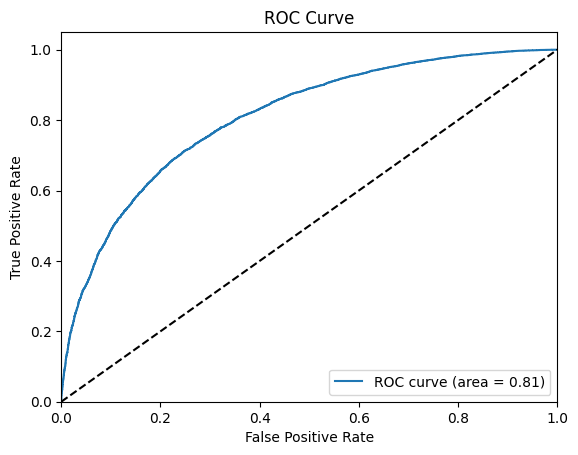

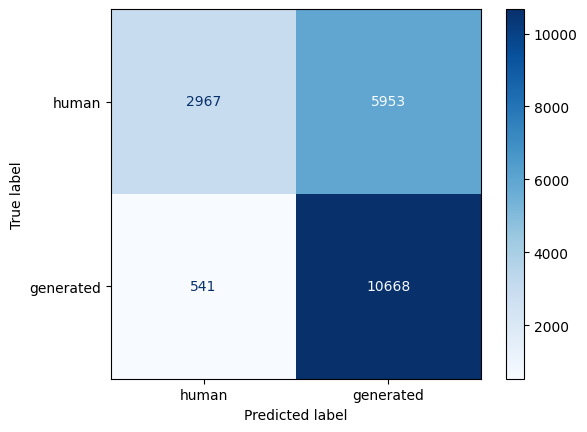

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

def validate_predictions(predictions, dataset):
    # Convert predictions to dictionary for easy lookup
    pred_dict = dict(predictions)

    # Extract ids and labels from dataset
    ids = dataset['id']
    labels = dataset['label']

    # Match predictions with actual labels using ids
    y_true = []
    y_pred = []
    y_scores = []
    for id, label in zip(ids, labels):
        if id in pred_dict:
            y_true.append(label)
            y_pred.append(1 if pred_dict[id] > 0.5 else 0)  # Assuming binary classification
            y_scores.append(pred_dict[id])  # Store the prediction score for ROC curve

    # Calculate and print classification report and confusion matrix
    print(classification_report(y_true, y_pred, target_names=LABELS))
    cm = confusion_matrix(y_true, y_pred)

    # Calculate and print AUC-ROC
    auc = roc_auc_score(y_true, y_scores)
    print(f"AUC: {auc}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot confusion matrix using sklearn's ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Call the function
validate_predictions(es_robertalex_test, dataset_es["test"])

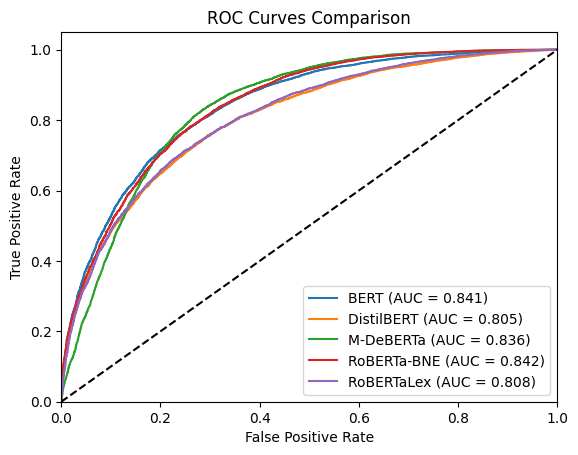

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# List of predictions and model names
predictions_list = [es_bert_test, es_distilbert_test, es_mdeberta_test, es_roberta_bne_test, es_robertalex_test]
model_names = ['BERT', 'DistilBERT', 'M-DeBERTa', 'RoBERTa-BNE', 'RoBERTaLex']

# Extract ids and labels from dataset
ids = dataset_es['test']['id']
labels = dataset_es['test']['label']

# Initialize figure for ROC curves
plt.figure()

# Calculate and plot ROC curve for each model
for predictions, model_name in zip(predictions_list, model_names):
    # Convert predictions to dictionary for easy lookup
    pred_dict = dict(predictions)

    # Match predictions with actual labels using ids
    y_true = []
    y_scores = []
    for id, label in zip(ids, labels):
        if id in pred_dict:
            y_true.append(label)
            y_scores.append(pred_dict[id])  # Store the prediction score for ROC curve

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

# Add details to the plot
plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [9]:
dataset_es['test']

Dataset({
    features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
    num_rows: 20129
})

In [10]:
import pandas as pd

# In spanish

model_names_es = ["es_bert", "es_distilbert", "es_mdeberta", "es_roberta_bne", "es_robertalex"]

# Create a dictionary with model names as keys and predictions as values for the test set
es_dict = {model_name: dict(p) for model_name, p in zip(model_names_es, [es_bert_test, es_distilbert_test, es_mdeberta_test, es_roberta_bne_test, es_robertalex_test])}

# Get all unique ids
ids = set()
for model_name, pred in es_dict.items():
    ids.update(pred.keys())

# Convert the set to a list
ids = list(ids)

# Create a DataFrame with the predictions for each model
df_es_test = pd.DataFrame({model_name: [pred[id] if id in pred else None for id in ids] for model_name, pred in es_dict.items()}, index=ids)

# Reset the index and rename it to 'id'
df_es_test.reset_index(inplace=True)
df_es_test.rename(columns={'index': 'id'}, inplace=True)


label_dict = {row['id']: row['label'] for row in dataset_es['test']}
df_es_test['label'] = df_es_test['id'].map(label_dict)

df_es_test

,id,es_bert,es_distilbert,es_mdeberta,es_roberta_bne,es_robertalex,label
0,0,0.976117,0.920304,0.998800,0.996452,0.858781,1
1,1,0.998078,0.996651,0.998779,0.998049,0.995461,1
2,2,0.996518,0.994089,0.999004,0.998044,0.988994,1
3,3,0.995447,0.993676,0.998858,0.997629,0.958579,1
4,4,0.996079,0.997149,0.997832,0.998104,0.970783,1
...,...,...,...,...,...,...,...
20124,20370,0.981375,0.985176,0.998158,0.995447,0.973419,1
20125,20371,0.986605,0.775265,0.996568,0.986310,0.664751,1
20126,20372,0.897701,0.422377,0.989490,0.382251,0.739508,1
20127,20373,0.988846,0.982766,0.988094,0.994264,0.981685,1


In [11]:
es_bert_val = es_bert_val1 + es_bert_val2
es_distilbert_val = es_distilbert_val1 + es_distilbert_val2
es_mdeberta_val = es_mdeberta_val1 + es_mdeberta_val2
es_roberta_bne_val = es_roberta_bne_val1 + es_roberta_bne_val2
es_robertalex_val = es_robertalex_val1 + es_robertalex_val2
len(es_robertalex_val)

9620

In [12]:
import pandas as pd

# In spanish

model_names_es = ["es_bert", "es_distilbert", "es_mdeberta", "es_roberta_bne", "es_robertalex"]

# Create a dictionary with model names as keys and predictions as values for the validation set
es_dict_val = {model_name: dict(p) for model_name, p in zip(model_names_es, [es_bert_val, es_distilbert_val, es_mdeberta_val, es_roberta_bne_val, es_robertalex_val])}

# Get all unique ids
ids_val = set()
for model_name, pred in es_dict_val.items():
    ids_val.update(pred.keys())

# Convert the set to a list
ids_val = list(ids_val)

# Create a DataFrame with the predictions for each model
df_es_val = pd.DataFrame({model_name: [pred[id] if id in pred else None for id in ids_val] for model_name, pred in es_dict_val.items()}, index=ids_val)

# Reset the index and rename it to 'id'
df_es_val.reset_index(inplace=True)
df_es_val.rename(columns={'index': 'id'}, inplace=True)

# Add the true labels to the DataFrame

dataset_es_val = concatenate_datasets([dataset_es['validation1'], dataset_es['validation2']])

label_dict_val = {row['id']: row['label'] for row in dataset_es_val}

df_es_val['label'] = df_es_val['id'].map(label_dict_val)

df_es_val

,id,es_bert,es_distilbert,es_mdeberta,es_roberta_bne,es_robertalex,label
0,32770,0.960259,0.994091,0.996316,0.997197,0.838383,1
1,32774,0.995309,0.997274,0.998607,0.983308,0.991037,1
2,32776,0.998312,0.997163,0.998251,0.998095,0.992100,1
3,9,0.998662,0.997237,0.997929,0.997526,0.993566,1
4,13,0.998378,0.997093,0.997155,0.996913,0.995433,1
...,...,...,...,...,...,...,...
9615,32761,0.817556,0.994160,0.976882,0.993848,0.962127,1
9616,32762,0.952990,0.985162,0.998087,0.985822,0.983199,1
9617,32763,0.983130,0.936117,0.993247,0.419090,0.918335,1
9618,32764,0.128685,0.910238,0.994999,0.872589,0.756852,1


In [13]:
# In english
import pandas as pd

model_names_en = ["en_albert", "en_bert", "en_deberta", "en_distilbert", "en_mdeberta"]

# Create a dictionary with model names as keys and predictions as values for the test set
en_dict = {model_name: dict(p) for model_name, p in zip(model_names_en, [en_albert_test, en_bert_test, en_deberta_test, en_distilbert_test, en_mdeberta_test])}

# Get all unique ids
ids = set()
for model_name, pred in en_dict.items():
    ids.update(pred.keys())

# Convert the set to a list
ids = list(ids)

# Create a DataFrame with the predictions for each model
df_en_test = pd.DataFrame({model_name: [pred[id] if id in pred else None for id in ids] for model_name, pred in en_dict.items()}, index=ids)


# Reset the index and rename it to 'id'
df_en_test.reset_index(inplace=True)
df_en_test.rename(columns={'index': 'id'}, inplace=True)


label_dict = {row['id']: row['label'] for row in dataset_en['test']}
df_en_test['label'] = df_en_test['id'].map(label_dict)

df_en_test

,id,en_albert,en_bert,en_deberta,en_distilbert,en_mdeberta,label
0,0,0.950166,0.903232,0.996085,0.910086,0.995117,1
1,1,0.880868,0.900462,0.966619,0.870194,0.993310,1
2,2,0.963124,0.917844,0.997082,0.930069,0.996736,1
3,3,0.833486,0.959765,0.997854,0.969949,0.997186,1
4,4,0.974562,0.949169,0.982572,0.887538,0.995045,1
...,...,...,...,...,...,...,...
21827,21971,0.779658,0.942919,0.990364,0.942520,0.963665,1
21828,21972,0.977129,0.983792,0.996825,0.989400,0.997097,1
21829,21973,0.964843,0.979003,0.997191,0.983853,0.995864,1
21830,21974,0.729005,0.964290,0.996194,0.932346,0.994232,1


In [14]:
en_albert_val = en_albert_val1 + en_albert_val2
en_bert_val = en_bert_val1 + en_bert_val2
en_deberta_val = en_deberta_val1 + en_deberta_val2
en_distilbert_val = en_distilbert_val1 + en_distilbert_val2
en_mdeberta_val = en_mdeberta_val1 + en_mdeberta_val2

len(en_distilbert_val)

10154

In [15]:
import pandas as pd

# In english

model_names_en = ["en_albert", "en_bert", "en_deberta", "en_distilbert", "en_mdeberta"]

# Create a dictionary with model names as keys and predictions as values for the validation set
en_dict_val = {model_name: dict(p) for model_name, p in zip(model_names_en, [en_albert_val, en_bert_val, en_deberta_val, en_distilbert_val, en_mdeberta_val])}

# Get all unique ids
ids_val = set()
for model_name, pred in en_dict_val.items():
    ids_val.update(pred.keys())

# Convert the set to a list
ids_val = list(ids_val)

# Create a DataFrame with the predictions for each model
df_en_val = pd.DataFrame({model_name: [pred[id] if id in pred else None for id in ids_val] for model_name, pred in en_dict_val.items()}, index=ids_val)

# Reset the index and rename it to 'id'
df_en_val.reset_index(inplace=True)
df_en_val.rename(columns={'index': 'id'}, inplace=True)

# Add the true labels to the DataFrame

dataset_en_val = concatenate_datasets([dataset_en['validation1'], dataset_en['validation2']])

label_dict_val = {row['id']: row['label'] for row in dataset_en_val}

df_en_val['label'] = df_en_val['id'].map(label_dict_val)

df_en_val

,id,en_albert,en_bert,en_deberta,en_distilbert,en_mdeberta,label
0,32768,0.937834,0.979962,0.996127,0.978508,0.991850,1
1,1,0.978746,0.983681,0.992693,0.991301,0.995757,1
2,32769,0.591083,0.851326,0.993425,0.816709,0.984502,1
3,0,0.964702,0.978652,0.997643,0.989184,0.996626,1
4,32771,0.548939,0.717727,0.996407,0.122259,0.991052,1
...,...,...,...,...,...,...,...
10149,32755,0.710980,0.953035,0.994998,0.947657,0.994689,1
10150,32760,0.728136,0.684954,0.727092,0.213583,0.850873,1
10151,32762,0.714323,0.948287,0.956405,0.876242,0.978808,1
10152,32764,0.712042,0.876678,0.993988,0.535763,0.993962,1


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch import nn
from sklearn.metrics import accuracy_score
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from collections import Counter



class TransformerEnsemble:
    def __init__(self, num_models, ensemble_model=LogisticRegression(max_iter=10000), df_train=None, df_test=None):
        self.num_models = num_models
        self.df_train = df_train
        self.df_test = df_test
        self.ensemble_model = ensemble_model
        self.scaler = StandardScaler()

    def train(self):
        
        
        #df_train, df_test = train_test_split(self.df_train, test_size=0.3, random_state=42)

        print("Predictions shape:", self.df_train.shape)

        X_train = self.df_train.drop(columns=['id', 'label'])
        y_train = self.df_train['label']

        #X_train = self.scaler.fit_transform(X_train)

        #X_test = df_test.drop(columns=['id', 'label'])
        #y_test = df_test['label']

        self.ensemble_model.fit(X_train, y_train)

        #X_test = self.scaler.transform(X_test)

        #y_pred = self.ensemble_model.predict(X_test)

        #print(classification_report(y_test, y_pred))

    def train_grid_search(self):
        # Define a more extensive parameter grid
        param_grid = {
            'class_weight': [{0: 50, 1: 1}, {0: 60, 1: 1}, {0: 70, 1: 1}, {0: 80, 1: 1}, {0: 90, 1: 1}, {0: 100, 1: 1}, {0: 150, 1: 1}, {0: 200, 1: 1}],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Wider range of regularization parameters
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # More solver options
        }

        # Initialize a Logistic Regression model
        logreg = LogisticRegression(max_iter=10000)

        # Initialize a GridSearchCV object
        grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')

        # Split the DataFrame into features and target
        X = self.df_train.drop(columns=['id', 'label'])
        y = self.df_train['label']

        # Perform the grid search
        grid_search.fit(X, y)

        # Print the best parameters and the best score
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        # Train the ensemble model using the best parameters
        self.ensemble_model = LogisticRegression(**grid_search.best_params_)
        self.ensemble_model.fit(X, y)


    def validate(self):
        X_test = self.df_test.drop(columns=['id', 'label'])
        y_test = self.df_test['label']

        #X_test = self.scaler.transform(X_test)

        y_pred = self.ensemble_model.predict(X_test)

        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        class_distribution = Counter(y_pred)

        # Print the counts of each class
        print(f"Count of class 0: {class_distribution[0]}")
        print(f"Count of class 1: {class_distribution[1]}")

    def predict_df(self):

        df_predictions = self.df_test.copy()

        # Get the features from df_test
        X_test = df_predictions

        # Get the predicted labels
        y_pred = self.ensemble_model.predict(X_test.drop(columns=['id']))

        # Get the predicted probabilities
        y_pred_prob = self.ensemble_model.predict_proba(X_test.drop(columns=['id']))

        # Add the predicted labels and probabilities to df_test
        df_predictions['predicted_label'] = y_pred
        df_predictions['predicted_prob'] = y_pred_prob[:, 1]

        return df_predictions

    def predict(self):
        X_test = self.df_test.drop(columns=['label'])

        y_pred = self.ensemble_model.predict(X_test.drop(columns=['id']))

        # Create a DataFrame with the predictions
        df_pred = pd.DataFrame({
            'id': X_test['id'],
            'label': y_pred
        })

        # Replace the numeric labels with string labels
        #df_pred['label'] = df_pred['label'].replace({0 : "human", 1 : "generated"})

        # Convert the DataFrame to a list of dictionaries
        predictions = df_pred.to_dict('records')

        # Print the predictions
        #for prediction in predictions:
        #    print(prediction)

        return predictions
    
    def predict_list(self):
        X_test = self.df_test.drop(columns=['label'])

        y_pred = self.ensemble_model.predict_proba(X_test.drop(columns=['id']))

        # Create a DataFrame with the predictions
        df_pred = pd.DataFrame({
            'id': X_test['id'],
            'label': y_pred[:, 1]  # Assuming binary classification and you want the probability of the second class
        })

        # Convert the DataFrame to a list of tuples
        predictions = list(df_pred.itertuples(index=False, name=None))

        return predictions



In [33]:
# Read from file

te = TransformerEnsemble(num_models=3, df_train=df_es_val, df_test=df_es_test)

In [30]:
te.train()
te.validate()

Predictions shape: (9620, 7)
              precision    recall  f1-score   support

           0       0.95      0.37      0.54      8920
           1       0.66      0.98      0.79     11209

    accuracy                           0.71     20129
   macro avg       0.81      0.68      0.66     20129
weighted avg       0.79      0.71      0.68     20129

[[ 3339  5581]
 [  180 11029]]
Count of class 0: 3519
Count of class 1: 16610


In [34]:
te.train_grid_search()

Best parameters: {'C': 1000, 'class_weight': {0: 50, 1: 1}, 'solver': 'liblinear'}
Best score: 0.8139981989583681


In [35]:
te.validate()

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8920
           1       0.82      0.74      0.78     11209

    accuracy                           0.77     20129
   macro avg       0.77      0.77      0.76     20129
weighted avg       0.77      0.77      0.77     20129

[[7131 1789]
 [2934 8275]]
Count of class 0: 10065
Count of class 1: 10064


In [36]:
es_ens_preds = te.predict_list()

              precision    recall  f1-score   support

       human       0.71      0.80      0.75      8920
   generated       0.82      0.74      0.78     11209

    accuracy                           0.77     20129
   macro avg       0.77      0.77      0.76     20129
weighted avg       0.77      0.77      0.77     20129

AUC: 0.8608808304665493


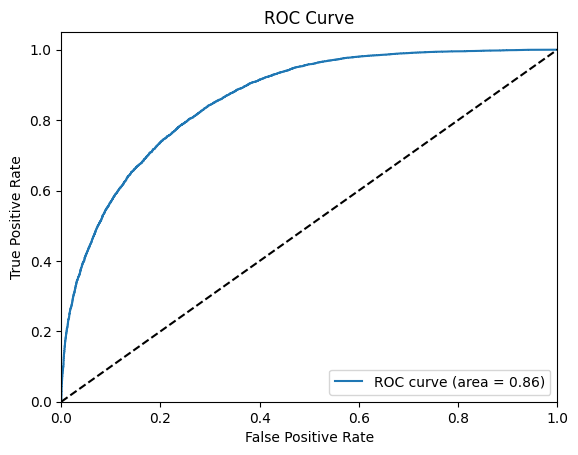

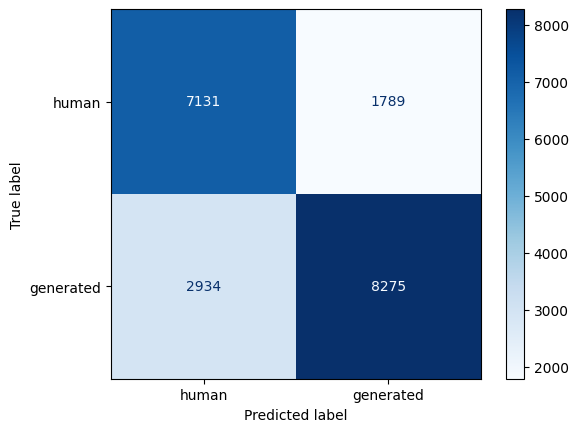

In [37]:
validate_predictions(es_ens_preds, dataset_es["test"])

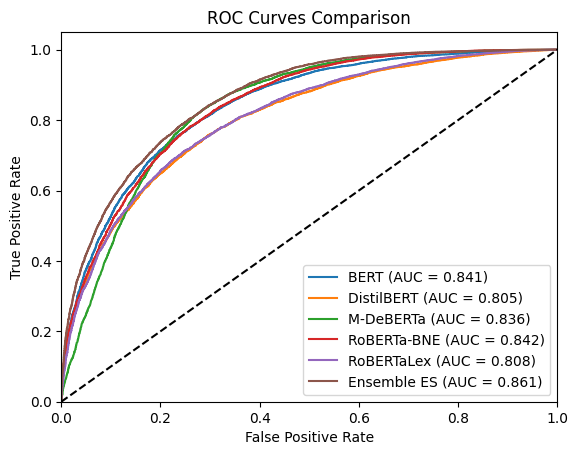

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# List of predictions and model names
predictions_list = [es_bert_test, es_distilbert_test, es_mdeberta_test, es_roberta_bne_test, es_robertalex_test, es_ens_preds]
model_names = ['BERT', 'DistilBERT', 'M-DeBERTa', 'RoBERTa-BNE', 'RoBERTaLex', 'Ensemble ES']

# Extract ids and labels from dataset
ids = dataset_es['test']['id']
labels = dataset_es['test']['label']

# Initialize figure for ROC curves
plt.figure()

# Calculate and plot ROC curve for each model
for predictions, model_name in zip(predictions_list, model_names):
    # Convert predictions to dictionary for easy lookup
    pred_dict = dict(predictions)

    # Match predictions with actual labels using ids
    y_true = []
    y_scores = []
    for id, label in zip(ids, labels):
        if id in pred_dict:
            y_true.append(label)
            y_scores.append(pred_dict[id])  # Store the prediction score for ROC curve

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

# Add details to the plot
plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [47]:
te_en = TransformerEnsemble(num_models=5, df_train=df_en_val, df_test=df_en_test)

In [48]:
te_en.train_grid_search()

Best parameters: {'C': 100, 'class_weight': {0: 40, 1: 1}, 'solver': 'lbfgs'}
Best score: 0.8040880241520878


In [26]:
te_en.train()
te_en.validate()

Predictions shape: (10154, 7)
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     10642
           1       0.83      0.81      0.82     11190

    accuracy                           0.82     21832
   macro avg       0.82      0.82      0.82     21832
weighted avg       0.82      0.82      0.82     21832

[[8804 1838]
 [2107 9083]]
Count of class 0: 10911
Count of class 1: 10921


In [49]:
en_ens_preds = te_en.predict_list()

              precision    recall  f1-score   support

       human       0.84      0.77      0.80     10642
   generated       0.80      0.86      0.83     11190

    accuracy                           0.82     21832
   macro avg       0.82      0.82      0.82     21832
weighted avg       0.82      0.82      0.82     21832

AUC: 0.9050422651308766


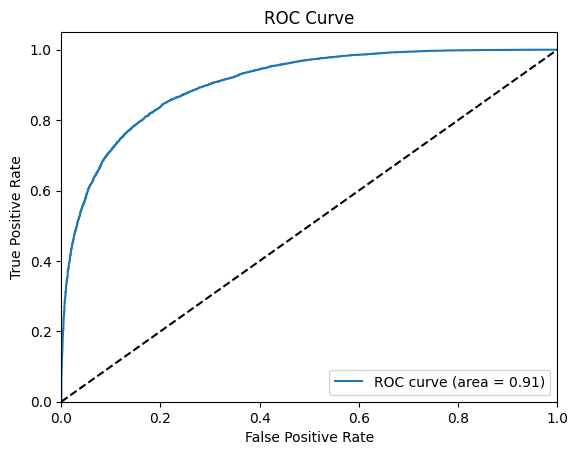

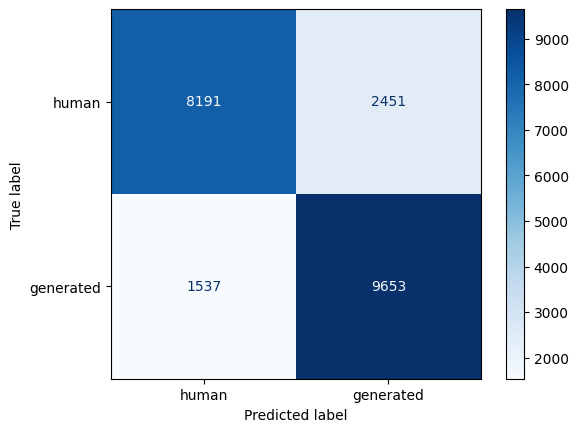

In [50]:
validate_predictions(en_ens_preds, dataset_en["test"])

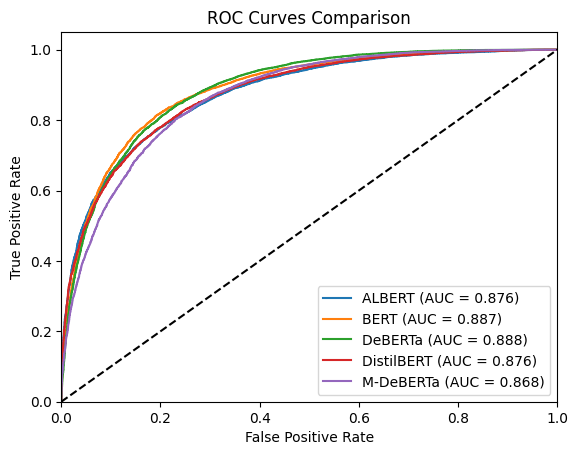

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# List of predictions and model names
predictions_list = [en_albert_test, en_bert_test, en_deberta_test, en_distilbert_test, en_mdeberta_test]
model_names = ['ALBERT', 'BERT', 'DeBERTa', 'DistilBERT', 'M-DeBERTa']

# Extract ids and labels from dataset
ids = dataset_en['test']['id']  # Change to English dataset
labels = dataset_en['test']['label']  # Change to English dataset

# Initialize figure for ROC curves
plt.figure()

# Calculate and plot ROC curve for each model
for predictions, model_name in zip(predictions_list, model_names):
    # Convert predictions to dictionary for easy lookup
    pred_dict = dict(predictions)

    # Match predictions with actual labels using ids
    y_true = []
    y_scores = []
    for id, label in zip(ids, labels):
        if id in pred_dict:
            y_true.append(label)
            y_scores.append(pred_dict[id])  # Store the prediction score for ROC curve

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

# Add details to the plot
plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")

# Show the plot
plt.show()